In [38]:
# Some useful settings for interactive work
%load_ext autoreload
%autoreload 2

%matplotlib widget

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
# Importing the necessary libraries
import utilities.parameters_helper as ph
from render.scene_render import SceneRender
from controller.vehicle_rate_mpc import VehicleRateMPC
import numpy as np
from scipy.spatial.transform import Rotation as R
import matplotlib.pyplot as plt

In [40]:
# Load and List Configs
cfg = ph.Configs(fout_config="track_sigmoid")
cfg.list_configs()

# Breakdown Relevant Configs
gsp_prms = cfg.get_config('gaussian_splat')
fout_wps = cfg.get_config('fout_waypoints')
mpc_prms = cfg.get_config('mpc_parameters')
drn_prms = cfg.get_config('drone_parameters')
ctl_prms = cfg.get_config('control_parameters')

Currently Loaded Configs:
Configs:
 - gaussian_splat    : scene003
 - fout_waypoints    : track_sigmoid
 - mpc_parameters    : flightroom
 - drone_parameters  : carl
 - control_parameters: body_rate_v1


In [24]:
# Load the Gaussian Splat
gsplat = SceneRender(gsp_prms)

Loading latest checkpoint from load_dir

✅ Done loading checkpoint from 
/home/admin/StanfordMSL/SFTI-Program/nerf_data/outputs/backroom/splatfacto/2024-11-13_204632/nerfstudio_models/step-0000
29999.ckpt

In [ ]:
xcr = np.array([
    0.0, 0.0, -1.0,
    0.0, 0.0, 0.0,
    0.0, 0.0, 0.0, 1.0
])

T_c2b = np.array(    [
        [-0.00866, -0.12186, -0.99250,  0.10000],
        [ 0.99938, -0.03463, -0.00446, -0.03100],
        [-0.03383, -0.99194,  0.12209, -0.01200],
        [ 0.00000,  0.00000,  0.00000,  1.00000]
    ]  )
T_b2w = np.eye(4)
T_b2w[0:3,:] = np.hstack((R.from_quat(xcr[6:]).as_matrix(), xcr[0:3].reshape(-1, 1)))

T_c2w = T_b2w @ T_c2b
image = gsplat.render_rgb(T_c2w)

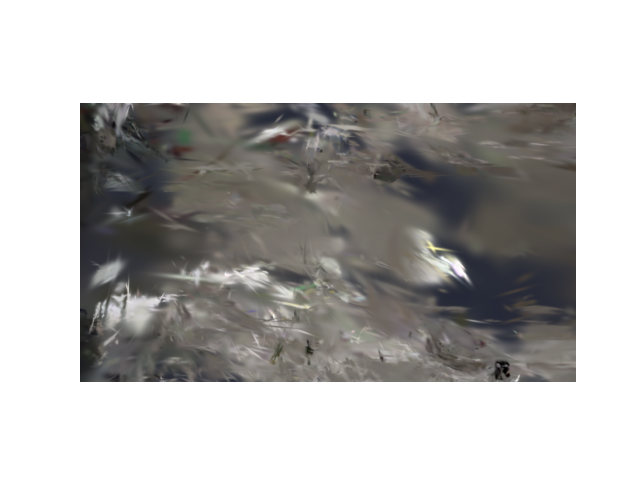

In [37]:
plt.imshow(image)
plt.axis('off')
plt.show()

In [23]:
policy = VehicleRateMPC(fout_wps,mpc_prms,drn_prms,ctl_prms)

field AcadosOcpDims.N has been migrated to AcadosOcpOptions.N_horizon. setting AcadosOcpOptions.N_horizon = N. For future comppatibility, please use AcadosOcpOptions.N_horizon directly.


In [16]:
policy.clear_generated_code()